In [14]:

import numpy as np
import cv2
import yaml
import matplotlib.pyplot as plt
import os
import time

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
data_path = "/mnt/ldata/data/spi/spi/rs435_2025-07-23-09-10-02_sb_lab_picking/postproc/rs435_2025-07-23-09-10-02_segment_1/"
traj_path = data_path + "CameraTrajectoryTransformed.txt"

traj = np.loadtxt(traj_path, delimiter=" ")
print("Original trajectory shape:", traj.shape)
timestamps = traj[:, 0]
traj = traj[:, 1:]
traj = traj.reshape(-1, 3, 4)

# append 0 0 0 1 to each 3x4 matrix
append_row = np.zeros((traj.shape[0], 1, 4))
append_row[:, 0, 3] = 1
traj = np.concatenate((traj, append_row), axis=1)


print(traj.shape)
print(timestamps.shape)

Original trajectory shape: (125, 13)
(125, 4, 4)
(125,)


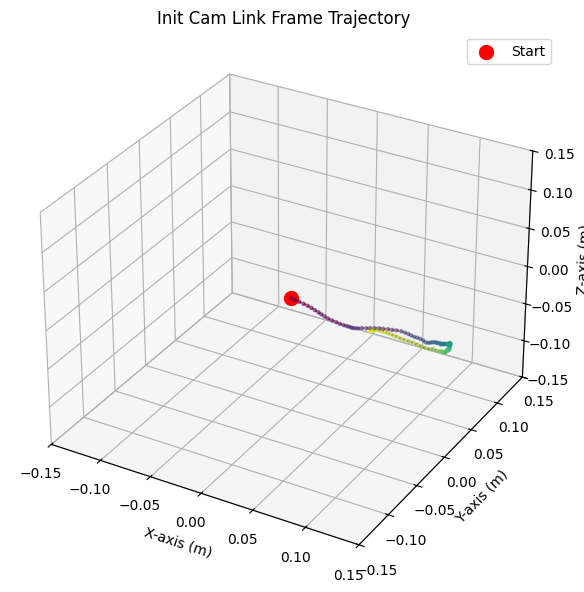

In [26]:
# 2. Create a figure and a 3D axes object
fig = plt.figure(figsize=(8, 6)) # Adjust figure size as needed
ax = fig.add_subplot(111, projection='3d') # '111' means 1 row, 1 column, first subplot
# 3. Plot the trajectory in 3D
traj_use = traj[:]
ax.scatter(traj_use[:, 0, 3], traj_use[:, 1, 3], traj_use[:, 2, 3], s=5, c=np.arange(len(traj_use)), cmap='viridis', alpha=0.5)    



# Add red marker at initial point
ax.scatter(traj_use[0, 0, 3], traj_use[0, 1, 3], traj_use[0, 2, 3], 
           s=100, c='red', marker='o', alpha=1.0, label='Start')


# Add arrows showing direction from each point to the next
for i in range(len(traj_use) - 1):
    # Current point
    x, y, z = traj_use[i, 0, 3], traj_use[i, 1, 3], traj_use[i, 2, 3]
    # Direction vector to next point
    dx = traj_use[i+1, 0, 3] - x
    dy = traj_use[i+1, 1, 3] - y
    dz = traj_use[i+1, 2, 3] - z
    # Add arrow
    ax.quiver(x, y, z, dx, dy, dz, color='red', alpha=0.6, arrow_length_ratio=0.5, length=0.5)

ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.set_title('Init Cam Link Frame Trajectory')
ax.set_xlim([-0.15, 0.15])  # Adjust limits as needed
ax.set_ylim([-0.15, 0.15])  # Adjust limits as needed
ax.set_zlim([-0.15, 0.15])  # Adjust limits as needed
ax.legend()
plt.tight_layout()
plt.show()


# 5. Display the plot
plt.show()